In [1]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read drivers sample list with performance metrics we need to track
df = pd.read_csv('household_power_consumption.txt', sep = ';')

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [5]:
df = pd.read_csv("household_power_consumption.txt",sep=';',
                         parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format = True,
                         low_memory=False, na_values=['nan','?'],index_col='dt')

In [6]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [8]:
df.shape

(2075259, 7)

In [9]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
## Encontrar nans:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
# Completar los nan con la media de la variable en cada columna
for j in range(0,7):
    df.iloc[:,j] = df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [13]:
# Verificar que se hayan imputado los datos
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

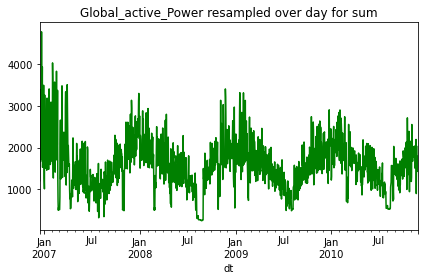

In [14]:
df.Global_active_power.resample("D").sum().plot(title="Global_active_Power resampled over day for sum",color='green')
plt.tight_layout()
plt.show()

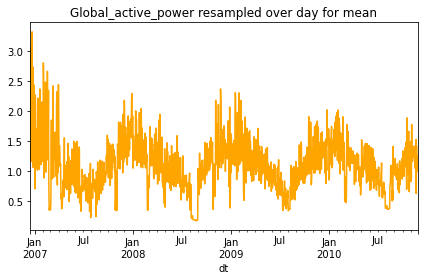

In [15]:
df.Global_active_power.resample("D").mean().plot(title="Global_active_power resampled over day for mean",color="orange")
plt.tight_layout()
plt.show()

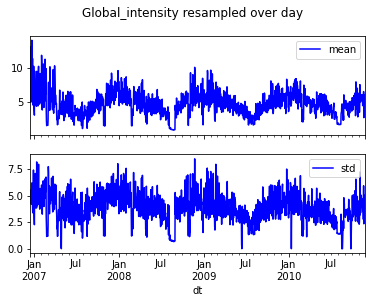

In [16]:
# Media y desviación estándar de "Global_intensity" resampled over day
r = df.Global_intensity.resample('D').agg(['mean','std'])
r.plot(subplots=True, title="Global_intensity resampled over day",color='blue')
plt.show()

Text(0.5, 1.0, 'Global_active_power per month (averaged over month)')

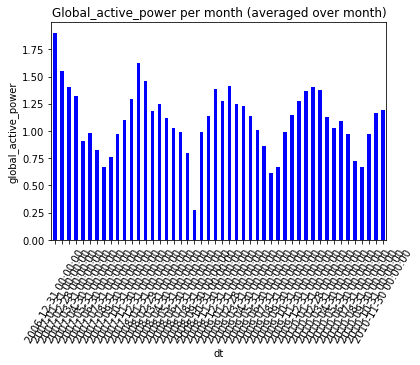

In [17]:
# sum of 'Global_active_power' resampled over month

df['Global_active_power'].resample('M').mean().plot(kind='bar',color='blue')
plt.xticks(rotation=60)
plt.ylabel('global_active_power')
plt.title("Global_active_power per month (averaged over month)")

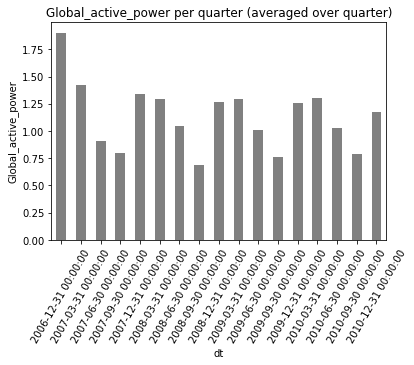

In [18]:
# Media de Global_active_power remuestreado en el trimestre
df['Global_active_power'].resample('Q').mean().plot(kind='bar',color='grey')
plt.xticks(rotation=60)
plt.ylabel("Global_active_power")
plt.title("Global_active_power per quarter (averaged over quarter)")
plt.show()

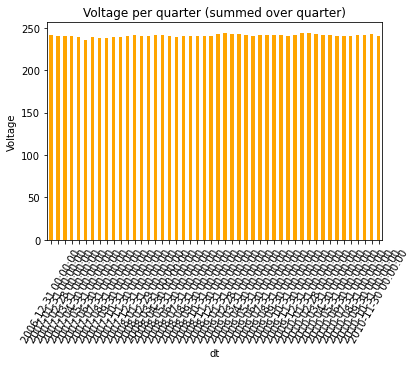

In [19]:
# mean of 'voltange' resampled over month
df['Voltage'].resample('M').mean().plot(kind='bar',color='orange')
plt.xticks(rotation=60)
plt.ylabel("Voltage")
plt.title("Voltage per quarter (summed over quarter)")
plt.show()

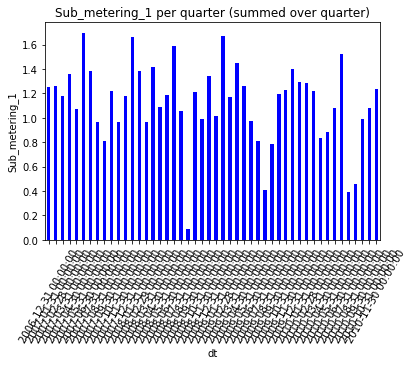

In [21]:
df.Sub_metering_1.resample("M").mean().plot(kind='bar',color='blue')
plt.xticks(rotation=60)
plt.ylabel("Sub_metering_1")
plt.title("Sub_metering_1 per quarter (summed over quarter)")
plt.show()

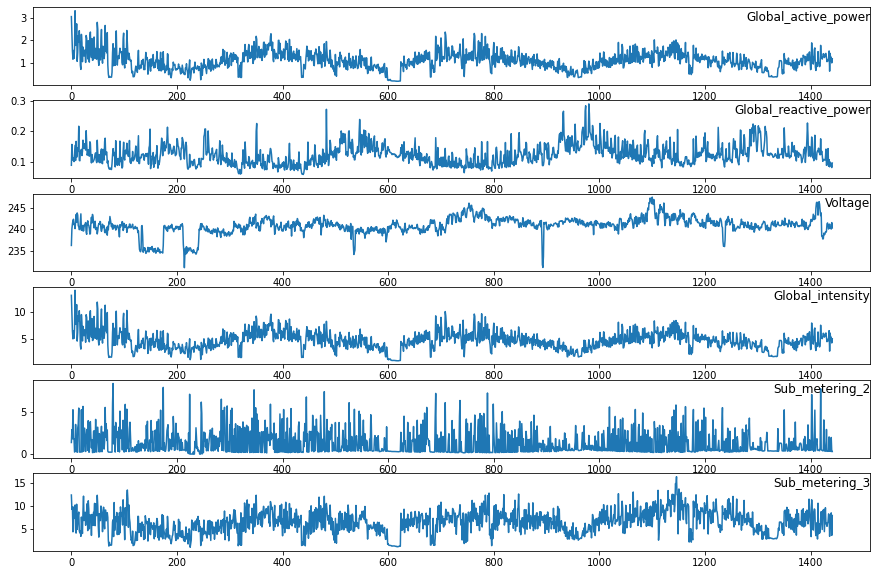

In [24]:
# below I compare the mean of different featuresampled over day
# specify columns to plot
cols = [0,1,2,3,5,6]

i = 1
groups = cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15,10))
for group in groups:
    plt.subplot(len(cols),1,i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1
plt.show()
    

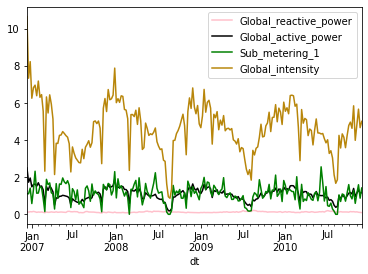

In [25]:
# resampling over week and computing mean 
df.Global_reactive_power.resample('W').mean().plot(color='pink',legend=True)
df.Global_active_power.resample('W').mean().plot(color='black', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='Green',legend=True)
df.Global_intensity.resample("W").mean().plot(color='DarkGoldenrod',legend=True)
plt.show()

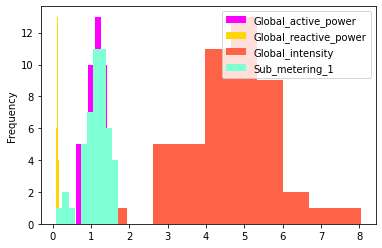

In [26]:
# hist plot of the mean of different feature resampled over month
df.Global_active_power.resample('M').mean().plot(kind='hist',color='Magenta',legend = True)
df.Global_reactive_power.resample("M").mean().plot(kind='hist',color='Gold',legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist',color='Tomato',legend=True)
df.Sub_metering_1.resample("M").mean().plot(kind='hist',color='Aquamarine',legend = True)
plt.show()